In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import xb.plotting as xp
import json

In [5]:
adata=sc.read('../../../figures/2.comparison_between_datasets/without_regional_annotations/anno_CosMx.h5ad')

In [9]:
ob=open('../../../figures/2.comparison_between_datasets/polygons/regions_CosMx.json')
js=json.load(ob)
output=pd.DataFrame(columns=['y','x','region_annotation','region_general'])

In [ ]:
transc

In [10]:
nu=0
for ob in js:
    for num in range(0,len(ob['coordinates'][0])):
        output.loc[nu,:]=list([ob['coordinates'][0][num][0],ob['coordinates'][0][num][1],ob['name'],ob['name'].replace(' [1]','').replace('D: ','')])
        nu=nu+1

In [19]:
from shapely.geometry import Point, Polygon
def domainassign(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
            for n in adatadom.obs.index:
                pnt=Point(adatadom.obs.loc[n,'y_centroid'],adatadom.obs.loc[n,'x_centroid'])
                if pnt.within(poli)==True:
                    adatadom.obs.loc[n,'region_annotation']=sel
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [12]:
dictio_region=dict(zip(output['region_annotation'],output['region_general']))

In [14]:
output

,y,x,region_annotation,region_general
0,26548.534059,-453743.96702,D: CTX,CTX
1,22896.884529,-453955.656848,D: CTX,CTX
2,17445.871462,-454114.424219,D: CTX,CTX
3,14958.515985,-454273.19159,D: CTX,CTX
4,14852.671071,-455067.028444,D: CTX,CTX
...,...,...,...,...
474,17777.538463,-460483.397372,D: Fiber tracts,Fiber tracts
475,17305.313931,-459453.089301,D: Fiber tracts,Fiber tracts
476,16446.723871,-458208.133715,D: Fiber tracts,Fiber tracts
477,15459.345303,-456576.812603,D: Fiber tracts,Fiber tracts


In [20]:
adata.obs['x_centroid']=adata.obs['CenterX_global_px']
adata.obs['y_centroid']=adata.obs['CenterY_global_px']

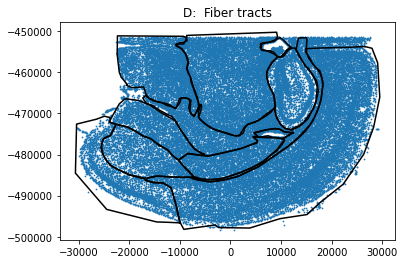

In [21]:
pls=output
#pls['x']=pls['x']*0.2125
#pls['y']=pls['y']*0.2125
adata_anno=domainassign(pls,adata)

In [29]:
adata_anno.obs['spatial annotation']=adata_anno.obs['region_annotation']

In [30]:
adata_anno.write('../../../figures/2.comparison_between_datasets/with_regional_anno/anno_CosMx.h5ad')